# Imports

In [1]:
# from silvhua_plot import *

In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\src")
from silvhua import *
from capstone_modelling import *
from model_eval_plot import plot_cv_metrics
from plot_functions import *

In [2]:
# import seaborn as sns
# import matplotlib.pyplot as plt
from PIL import Image
from sklearn.linear_model import LinearRegression
import numpy as np
# from sklearn import linear_model
# from sklearn.linear_model import LassoCV
# import re
from processing_functions import *

In [4]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_fw = load_csv('data_freeweight_corrected.csv',path, column1_as_index=False)
df_sm = load_csv('data_sm.csv',path, column1_as_index=False)

Dataframe shape:  (52, 15)
Dataframe shape:  (52, 15)


# Feature engineering

In [5]:
loads = [20, 40, 60, 80, 90]
unique_load_pairs = create_pairs(loads)
unique_load_pairs.append([40, 60, 80])
unique_load_pairs.append([40, 60, 80, 90])
unique_load_pairs

Number of unique pairs: 10


[[20, 40],
 [20, 60],
 [20, 80],
 [20, 90],
 [40, 60],
 [40, 80],
 [40, 90],
 [60, 80],
 [60, 90],
 [80, 90],
 [40, 60, 80],
 [40, 60, 80, 90]]

In [6]:
model_names = []
for load_pair in unique_load_pairs:
    name = 'LV '+'-'.join([str(item) for item in load_pair])
    model_names.append(name)
model_names

['LV 20-40',
 'LV 20-60',
 'LV 20-80',
 'LV 20-90',
 'LV 40-60',
 'LV 40-80',
 'LV 40-90',
 'LV 60-80',
 'LV 60-90',
 'LV 80-90',
 'LV 40-60-80',
 'LV 40-60-80-90']

In [7]:
# Create dataframes with engineered features: FW
df_fw_dict = dict()
for index, model in enumerate(model_names):
    df_fw_dict[model] = individual_regression2(df_fw, unique_load_pairs[index])
savepickle(df_fw_dict, 'feature engineering DF dictionary FW', 
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data\processed')
df_fw_dict.keys()

Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/data/processed/feature engineering DF dictionary FW.sav


dict_keys(['LV 20-40', 'LV 20-60', 'LV 20-80', 'LV 20-90', 'LV 40-60', 'LV 40-80', 'LV 40-90', 'LV 60-80', 'LV 60-90', 'LV 80-90', 'LV 40-60-80', 'LV 40-60-80-90'])

In [8]:
# Create dataframes with engineered features: SM
df_sm_dict = dict()
for index, model in enumerate(model_names):
    df_sm_dict[model] = individual_regression2(df_sm, unique_load_pairs[index])
savepickle(df_sm_dict, 'feature engineering DF dictionary SM', 
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data\processed')
df_sm_dict.keys()

Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/data/processed/feature engineering DF dictionary SM.sav


dict_keys(['LV 20-40', 'LV 20-60', 'LV 20-80', 'LV 20-90', 'LV 40-60', 'LV 40-80', 'LV 40-90', 'LV 60-80', 'LV 60-90', 'LV 80-90', 'LV 40-60-80', 'LV 40-60-80-90'])

## Make sure these values match what was calculated in iteration 2

In [9]:
df_fw_dict['LV 40-60'].tail(3)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
49,23.0,74.4,181.0,27.0,54.0,81.0,108.0,121.0,135.0,1.09,0.92,0.71,0.49,0.39,0.28,-128.571429,172.285714,0.275192
50,19.0,83.7,184.4,30.0,60.0,90.0,120.0,135.0,150.0,1.08,0.99,0.73,0.48,0.42,0.26,-115.384615,174.230769,0.275192
51,20.0,80.7,182.0,35.5,71.0,106.0,141.5,159.5,177.0,1.08,0.85,0.69,0.47,0.41,0.26,-218.750000,256.937500,0.275192


In [10]:
df_fw_dict['LV 40-60-80-90'].head(3)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-184.917733,250.021938,0.275192
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-116.018416,152.641372,0.275192
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-116.046002,162.019441,0.275192


## make sure each SM dataframe is unique

In [11]:
df_sm_dict['LV 40-60'].tail(3)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
49,23.0,74.4,181.0,31.0,62.0,93.0,124.0,139.5,155.0,1.17,0.95,0.75,0.53,0.42,0.27,-155.000000,209.250000,0.255577
50,19.0,62.5,174.0,24.0,48.0,72.0,96.0,108.0,120.0,1.11,0.87,0.71,0.50,0.39,0.28,-150.000000,178.500000,0.255577
51,20.0,104.6,182.0,45.0,90.0,135.0,180.0,202.5,225.0,1.02,0.85,0.63,0.46,0.34,0.23,-204.545455,263.863636,0.255577


In [12]:
df_sm_dict['LV 40-60-80-90'].head(3)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,42.0,84.0,126.0,168.0,189.0,210.0,1.05,0.92,0.72,0.51,0.40,0.28,-202.056192,270.560822,0.255577
1,21.0,71.6,179.0,30.0,60.0,90.0,120.0,135.0,150.0,1.06,0.90,0.67,0.50,0.38,0.26,-147.126249,191.364827,0.255577
2,19.0,60.8,165.0,30.0,60.0,90.0,120.0,135.0,150.0,1.09,0.92,0.74,0.48,0.36,0.24,-131.201044,183.250653,0.255577


# Repeat modelling for different feature engineering
(i.e. iteration 2)


LV 20-40 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			13.55		55.76		-42.21
MAE: 			9.97		40.13		-30.15
mean error: 		0.00		34.81		-34.81
R^2: 			0.74		-3.33		4.07
Pearson r statistic: 	0.86		0.70		0.16
			p=0.00		p=0.00

predictions mean: 	136.28		171.09		-34.81
predictions std: 	23.13		58.45		-35.32

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 1.4572574180753088
	LV intercept: 1.6057812090308095
	model intercept:  47.67430442274886
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/models/02b iteration LV 20-40.sav

LV 20-60 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			9.19		22.65		-13.46
MAE: 			6.82		16.96		-10.14
mean error: 		0.00		15.73		-15.73
R^2: 			0.88		0.29		0.60
Pearson r statistic: 	0.94		0.90		0.04
			p=0.00		p=0.00

predictions mean: 	136.28		152.01		-15.73
predictions std: 	25.18		35.59		-10.41

target mean: 136.28
target std: 27.07

Model featur

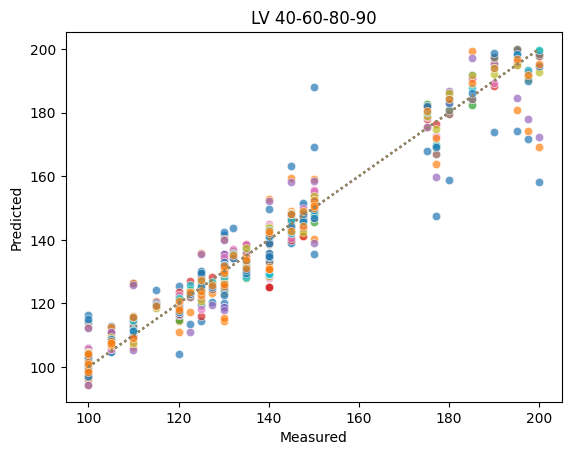

In [13]:
predictions_fw, metrics_fw, model_dict_fw = batch_model(model_names, 
    df_fw_dict, pickle_name='02b iteration')

# Plot CV metrics

In [14]:
cv_mae_fw, cv_r2_fw = batch_run_cv(model_names, df_fw_dict, LinearRegression())
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\model metrics'
save_csv(cv_mae_fw, '02b iteration CV MAE fw', path)
# sns.reset_defaults()    
    # sns.set_theme(context=context, style='ticks')
    # %matplotlib inlinesave_csv(cv_mae_fw, '02b iteration CV r2 fw', path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/02b iteration CV MAE fw.csv


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


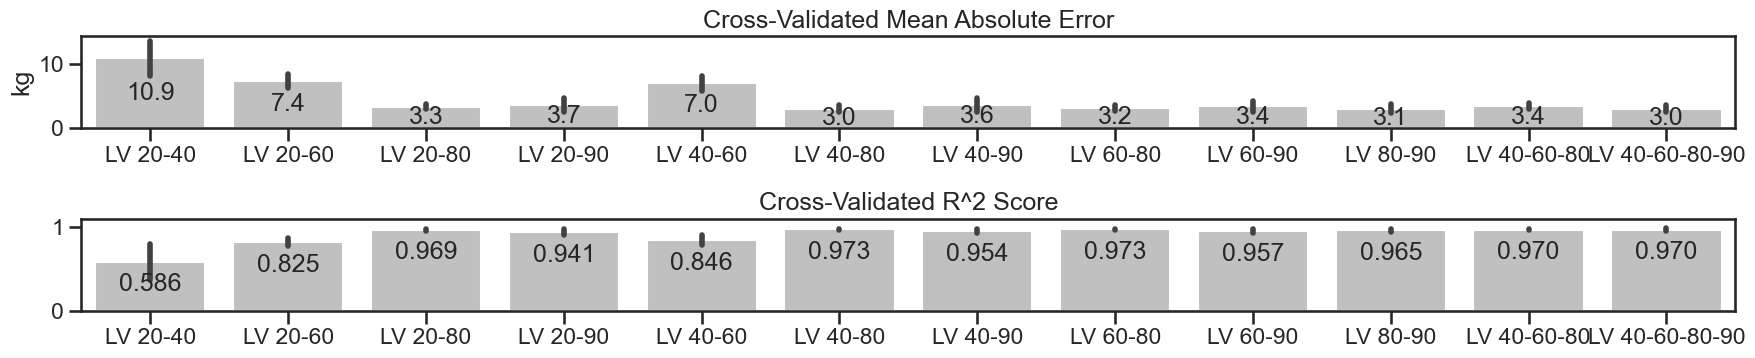

In [15]:
sns.reset_defaults()    
sns.set_theme(context='talk', style='ticks')
%matplotlib inline

plot_cv_metrics(cv_mae_fw, cv_r2_fw).savefig(
    '../output/figures/02b iteration CV metrics ALL MODELS.png')

# Plot residuals

## Load previously saved outputs

In [37]:
# Load iteration 4 data
predictions_fw4 = load_csv('04 iteration FW predictions.csv',
    r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\predictions', column1_as_index=True)
predictions_fw4.head()

Dataframe shape:  (52, 5)


,Measured,Stat Ind MVT,Stat Grp MVT,OLS,Lasso
0,190.0,208.906977,205.903846,198.812957,198.715435
1,120.0,120.235117,119.643499,117.476501,117.472422
2,130.0,136.667447,134.771077,132.989254,132.902437
3,100.0,107.606094,105.870302,99.994711,100.244392
4,150.0,151.224036,153.300188,151.315727,151.163403


In [3]:
predictions_sm4 = load_csv('04 iteration SM predictions.csv',
    r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\predictions\Experiment 1', column1_as_index=True)
predictions_sm4.head()

Dataframe shape:  (52, 5)


,Measured,Stat Ind MVT,Stat Grp MVT,OLS,Lasso
0,210.0,215.445678,220.448438,216.826852,216.645797
1,150.0,154.019851,154.678374,148.500254,148.574658
2,150.0,153.841962,151.740987,148.466085,148.398408
3,120.0,129.210332,131.030514,124.605950,124.737982
4,175.0,177.855953,183.874976,178.534960,178.511058


In [56]:
# Load iteration 2 data
predictions_fw2 = load_csv('02 iteration predictions.csv',
    r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\predictions', column1_as_index=True)
predictions_fw2.head()

Dataframe shape:  (52, 11)


,LV 20-60,LV 20-80,LV 20-90,LV 40-60,LV 40-60-80,LV 40-60-80-90,LV 40-80,LV 60-80,LV 60-90,LV 80-90,Measured
0,195.507401,197.350598,188.319118,195.413912,198.812957,194.003028,197.153610,197.396051,192.019097,193.981152,190.0
1,114.450228,118.162019,119.788774,117.535411,117.476501,118.718647,119.164892,118.358085,118.314950,119.282740,120.0
2,140.399651,131.401621,126.308652,139.977943,132.989254,130.184262,131.717917,131.797101,129.706350,129.841625,130.0
3,96.203405,99.806443,100.147420,97.947865,99.994711,99.201835,99.874664,100.491740,99.050226,100.827301,100.0
4,158.985166,148.371223,149.126237,158.445948,151.315727,150.917899,149.612723,150.050525,151.511943,149.420814,150.0


In [6]:
predictions_sm5 = load_csv('05 iteration SM predictions.csv',
    r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\predictions\Experiment 2', column1_as_index=True)
predictions_sm5.head()

Dataframe shape:  (52, 13)


,Measured,LV 20-40,LV 20-60,LV 20-80,LV 20-90,LV 40-60,LV 40-80,LV 40-90,LV 60-80,LV 60-90,LV 80-90,LV 40-60-80,LV 40-60-80-90
0,210.0,198.251245,213.250081,216.720576,218.602451,211.794509,216.052491,217.584564,216.417574,217.629644,216.399139,216.826852,217.549112
1,150.0,151.810329,142.909613,150.553081,150.888672,142.619229,150.502203,150.434400,149.833678,149.755886,150.436633,148.500254,149.602774
2,150.0,157.252793,160.198553,146.573979,147.095455,161.033205,146.789507,147.546612,147.675331,148.235559,147.336224,148.466085,148.004239
3,120.0,135.781012,129.186200,124.277896,125.733723,129.044253,124.011774,124.857255,123.382035,124.388652,123.749718,124.605950,124.584810
4,175.0,171.395209,173.815170,179.605130,177.348524,172.502789,179.004004,176.508320,178.959032,176.376068,177.502695,178.534960,177.401320


## Plot residuals

### Experiment 1

In [4]:
def plot_residuals(predictions, title='Squat', 
    context='talk', annotate=True, ymin=-1.5, ymax=8, labels=None, pickle_name=None,
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures'):
    """2022-12-03 10:35 Mainly for presentation to keep it brief

    Plot residuals from all the models for a dataset.
        Parameters:
            - predictions (DataFrame): 
                Dataframe that contains target data ('Measured' column) and model predictions
                (1 column per model).
            - title (str): Overall plot title.
            - context (None or str): Seaborn .set_theme() parameter. 
                One of {paper, notebook, talk (default), poster}. If None, set to 'default (notebook)'.
            - annotate (bool): Whether or not to annotate the bar graph with values. Default is True.
            - labels (list of strings): Model names for plot labels.
        Returns:
            - fig3: Figure of prediction residuals
            - fig2: Figure with 2 subplots of bar charts, 1 for mean absolute error and other for 
                mean error for all models.

    Command syntax:
    """
    fw_models = predictions[predictions.columns[~predictions.columns.str.contains('Measured')]].columns.to_list()
    sns.reset_defaults()    
    %matplotlib inline
    font_scale=.8 if context=='talk' else 1
    rc={'lines.markersize': 6} if context=='talk' else None
    sns.set_theme(context=context, style='ticks', font_scale=font_scale, 
        rc=rc)
    nrows = round((len(fw_models)+3)//4)
    ncols=len(fw_models)
    if nrows > 1:
        # fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3.2))
        fig3, ax3 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3.2))
    else:
        # fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3.7))
        fig3, ax3 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3.7))
    # ax = ax.flatten()
    fig2, ax2 = plt.subplots(nrows=2, ncols=1, figsize=(3*len(fw_models), 2.5*2))
    fw_error = pd.DataFrame()
    fw_error['Measured'] = predictions['Measured'] # 2022-12-03 12:50
    for index, model in enumerate(fw_models):
        # Calculate error
        fw_error[model] = predictions[model] - predictions['Measured'] 
        fw_error['Error direction'] = fw_error[model]/abs(fw_error[model])

        # # Plot measured vs. predicted values for each model
        # ax[index].axline(xy1=(150, 150), slope=1, alpha=0.7, linewidth=0.5, color='orange')
        # if index == 0:
        #     ax[index].set_ylabel('Predicted') 
        # sns.scatterplot(data=predictions, x='Measured', y=model, ax=ax[index],
        #     alpha=0.5, marker='o', legend=False, 
        # ).set(xlabel=None, ylabel=None)
        # ax[index].set_title(labels[index] if labels else fw_models[index])
        # if index % ncols == 0:
        #     ax[index].set_ylabel('Predicted 1RM') 
        # if index >= len(fw_models) -ncols:
        #     ax[index].set_xlabel('Measured 1RM') 

        # Plot residuals
        sns.scatterplot(data=fw_error, y=model, 
            x='Measured', alpha=0.7, style='Error direction', markers={-1: 'v', 1: '^'},
            hue='Error direction', palette='coolwarm',
            ax=ax3[index], legend=False).axhline(y=0, alpha=0.8, linewidth=0.5, color='orange')
        ax3[index].set(title=(labels[index] if labels else fw_models[index]), 
            ylabel='Error (kg)' if (index % ncols == 0) else None, xlabel='Measured 1RM')
    # Make y-axis range the same
    error_min = fw_error[fw_models].min().min()-5
    error_max = fw_error[fw_models].max().max()+5
    ax3 = [ax.set_ylim([error_min, error_max]) for ax in ax3]

    # Calculate remaining evaluation metrics and reshape dataframe for plotting
    fw_error['Metric'] = 'Error'
    fw_mae = abs(fw_error.iloc[:,:-1])
    fw_mae['Metric'] = 'MAE'
    fw_metrics = pd.concat([fw_error, fw_mae], axis=0).melt(
        value_vars=fw_models, id_vars=['Metric'], var_name='model')
    print(f'Metrics dataframe shape (free weight data): {fw_metrics.shape}')

    # Plot evaluation metrics: 
        # MAE
    sns.barplot(data=fw_metrics[fw_metrics['Metric']=='MAE'], y='value', x='model',
        color='silver', errorbar=('se', 1.96), # error bars set to 95% confidence interval, or 1.96*standard error
        ax=ax2[1]).set_ylim([ymin, ymax])
    ax2[1].axhline(y=0, ls=':', color='grey')
    ax2[1].set(ylabel='MAE (kg)', xlabel=None, title='Mean Absolute Error', 
        xticklabels=fw_models if labels==None else labels)
        # Error
    sns.barplot(data=fw_metrics[fw_metrics['Metric']=='Error'], y='value', x='model',
        color='silver', errorbar=('se', 1.96), # error bars set to 95% confidence interval, or 1.96*standard error
        ax=ax2[0]).set_ylim([ymin, ymax])
    ax2[0].axhline(y=0, ls=':', color='grey')
    ax2[0].set(ylabel='Residual (kg)', xlabel=None, title='Mean Error (Residual)', 
        xticklabels=fw_models if labels==None else labels)
    
    # Label bars with value
    if annotate:
        for i in ax2[0].containers:
                ax2[0].bar_label(i, fmt='%.1f', label_type='center') 
        for i in ax2[1].containers:
                ax2[1].bar_label(i, fmt='%.1f', label_type='center') 
    # Titles and axis labels
    # fig.suptitle(title)
    fig2.suptitle(title+': Model Evaluation Metrics')
    fig3.suptitle(title+': Model Regression Residuals')
    # fig.tight_layout(rect=[0, 0, 1, 1])
    fig2.tight_layout(rect=[0, 0, 1, 0.98])
    fig3.tight_layout(rect=[0, 0, 1, 1])
    if pickle_name:
        
        path = path + f'/{pickle_name}_'
        # fig2.savefig(f'{path}error_bar_chart_{title}.png')
        # print('Figure saved: '+f'{path}_error_bar_chart_{title}.png')
        fig3.savefig(f'{path}residuals_plot_{title}.png')
        print('Figure saved: '+f'{path}_residuals_plot_{title}.png')
    return fig2, fig3




Metrics dataframe shape (free weight data): (416, 3)
Figure saved: C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures/04 iteration__error_bar_chart_FW Squat.png
Figure saved: C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures/04 iteration__residuals_plot_FW Squat.png


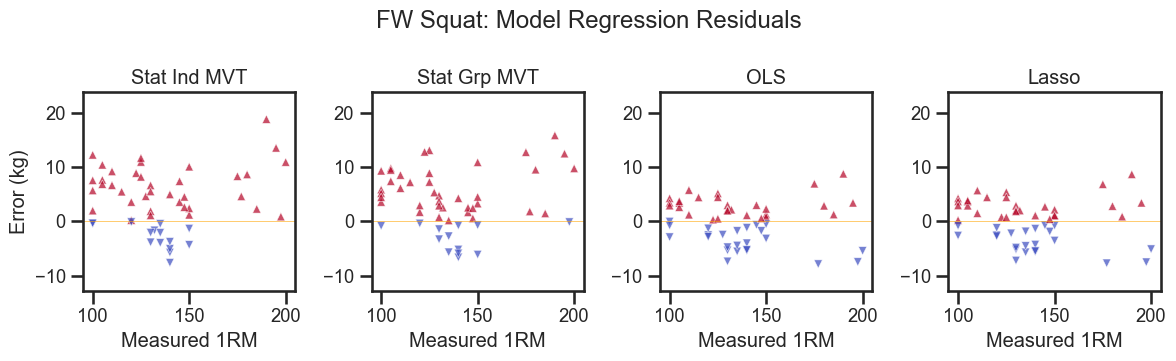

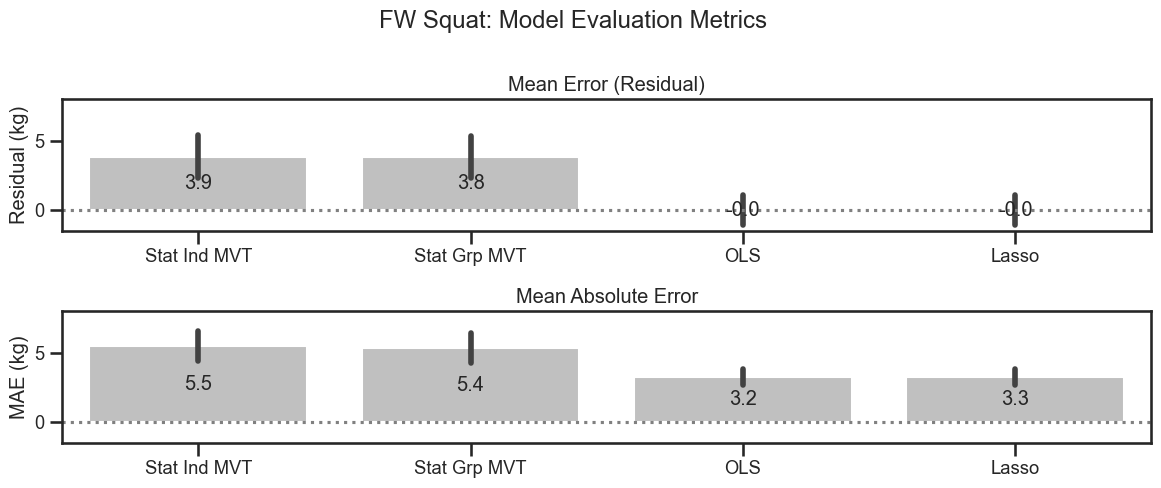

In [72]:
error_plot, residual_plot = plot_residuals(predictions_fw4, 
    title='FW Squat', context='talk', pickle_name='04 iteration')


Metrics dataframe shape (free weight data): (416, 3)
Figure saved: C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures/02_iteration_SM__residuals_plot_SM Squat.png


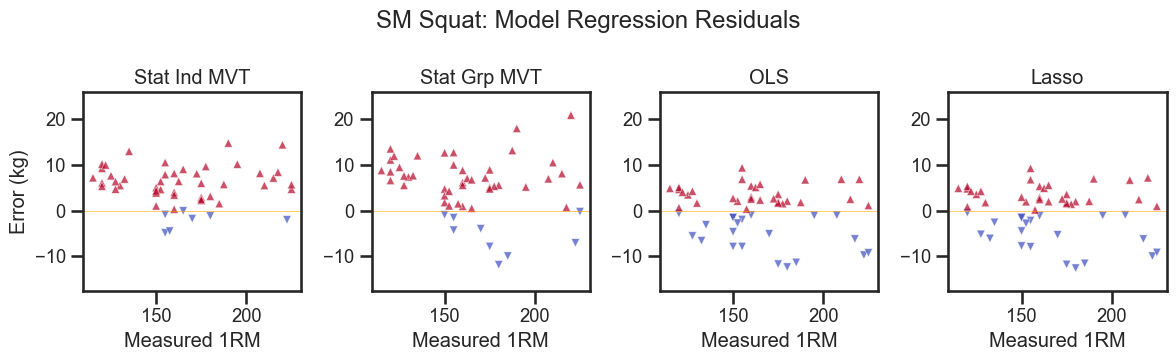

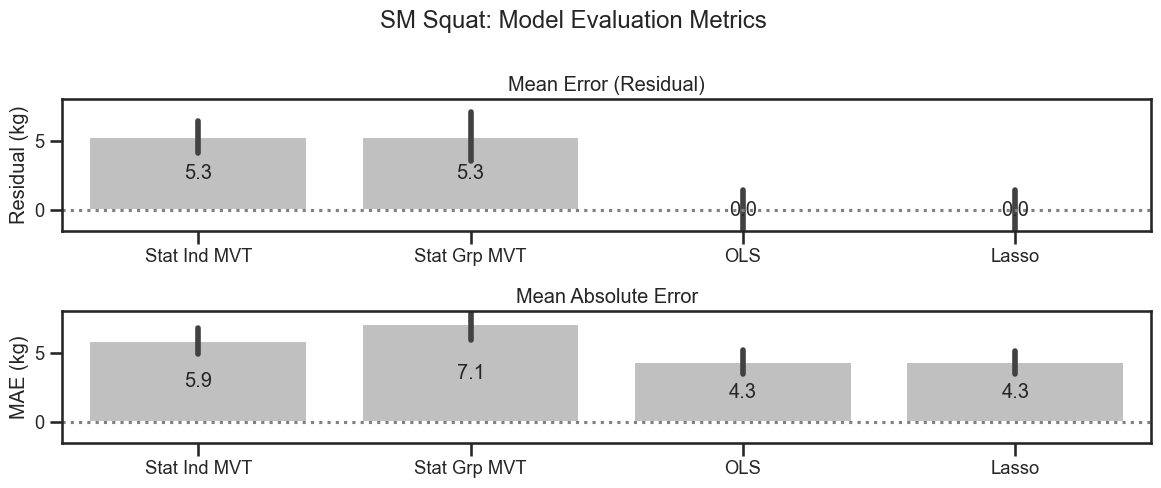

In [12]:
error_plot_sm, residual_plot_sm = plot_residuals(predictions_sm4, 
    title='SM Squat', context='talk', pickle_name='02_iteration_SM')

### Experiment 2

In [7]:
def plot_residuals2(predictions, title='Squat', 
    context='talk', annotate=True, ymin=-1.5, ymax=8, labels=None, pickle_name=None,
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures'):
    """2022-12-03 10:35 Mainly for presentation to keep it brief

    Plot residuals from all the models for a dataset.
        Parameters:
            - predictions (DataFrame): 
                Dataframe that contains target data ('Measured' column) and model predictions
                (1 column per model).
            - title (str): Overall plot title.
            - context (None or str): Seaborn .set_theme() parameter. 
                One of {paper, notebook, talk (default), poster}. If None, set to 'default (notebook)'.
            - annotate (bool): Whether or not to annotate the bar graph with values. Default is True.
            - labels (list of strings): Model names for plot labels.
        Returns:
            - fig3: Figure of prediction residuals
            - fig2: Figure with 2 subplots of bar charts, 1 for mean absolute error and other for 
                mean error for all models.

    Command syntax:
    """
    fw_models = predictions[predictions.columns[~predictions.columns.str.contains('Measured')]].columns.to_list()
    sns.reset_defaults()    
    %matplotlib inline
    font_scale=.8 if context=='talk' else 1
    rc={'lines.markersize': 6} if context=='talk' else None
    sns.set_theme(context=context, style='ticks', font_scale=font_scale, 
        rc=rc)
    if (len(fw_models) == 6) | (len(fw_models) == 3):
        ncols=3
        nrows = round((len(fw_models)+2)//3)
    else:
        nrows = round((len(fw_models)+3)//4)
        ncols=4
    fig3, ax3 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3))
    ax3 = ax3.flatten() if nrows > 1 else ax3
    fw_error = pd.DataFrame()
    fw_error['Measured'] = predictions['Measured'] 
    for index, model in enumerate(fw_models):
        # Calculate error
        fw_error[model] = predictions[model] - predictions['Measured'] 
        fw_error['Error direction'] = fw_error[model]/abs(fw_error[model])

        # Plot residuals
        ax3[index].axhline(y=0, alpha=0.9, linewidth=0.5, color='orange')
        sns.scatterplot(data=fw_error, y=model, 
            x='Measured', alpha=0.7, style='Error direction', markers={-1: 'v', 1: '^'},
            hue='Error direction', palette='coolwarm',
            ax=ax3[index], legend=False)
        ax3[index].set(title=(labels[index] if labels else fw_models[index]), 
            ylabel='Error (kg)' if (index % ncols == 0) else None, 
            xlabel='Measured 1RM' if index >= len(fw_models)-ncols else None)
    # Make y-axis range the same
    error_min = fw_error[fw_models].min().min()-5
    error_max = fw_error[fw_models].max().max()+5
    ax3 = [ax.set_ylim([error_min, error_max]) for ax in ax3]

    # Calculate remaining evaluation metrics and reshape dataframe for plotting
    fw_error['Metric'] = 'Error'
    fw_mae = abs(fw_error.iloc[:,:-1])
    fw_mae['Metric'] = 'MAE'
    fw_metrics = pd.concat([fw_error, fw_mae], axis=0).melt(
        value_vars=fw_models, id_vars=['Metric'], var_name='model')
    print(f'Metrics dataframe shape (free weight data): {fw_metrics.shape}')

    # Titles and axis labels
    fig3.suptitle(title+': Model Regression Residuals')
    fig3.tight_layout(rect=[0, 0, 1, 1])
    if pickle_name:    
        path = path + f'/{pickle_name}_'
        fig3.savefig(f'{path}residuals_plot_{title}.png')
        print('Figure saved: '+f'{path}residuals_plot_{title}.png')
    return fig3


Metrics dataframe shape (free weight data): (624, 3)
Figure saved: C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures/02 iteration_residuals_plot_FW Squat.png


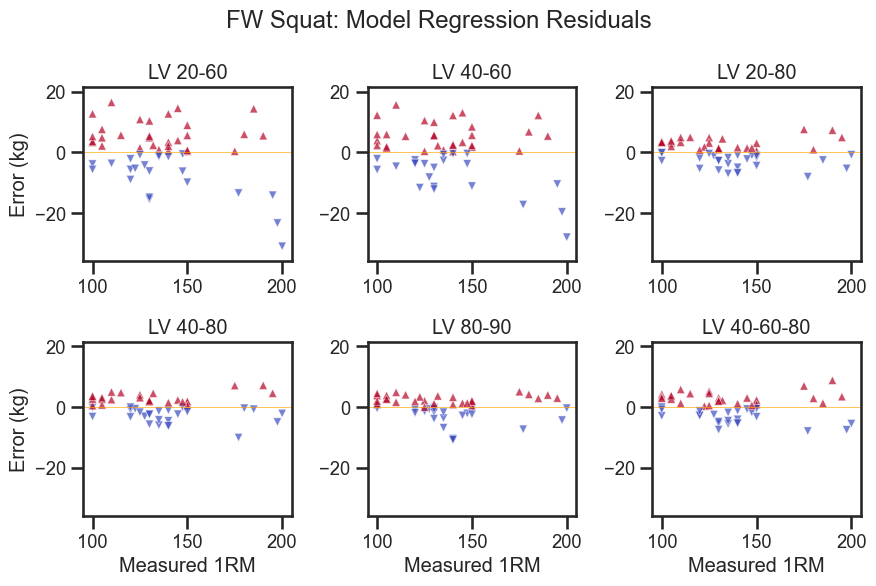

In [76]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
residual_plot2 = plot_residuals2(predictions_fw2[selected_models], 
    title='FW Squat', context='talk', pickle_name='02 iteration')


Metrics dataframe shape (free weight data): (624, 3)
Figure saved: C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures/05_iteration_SM_residuals_plot_SM Squat.png


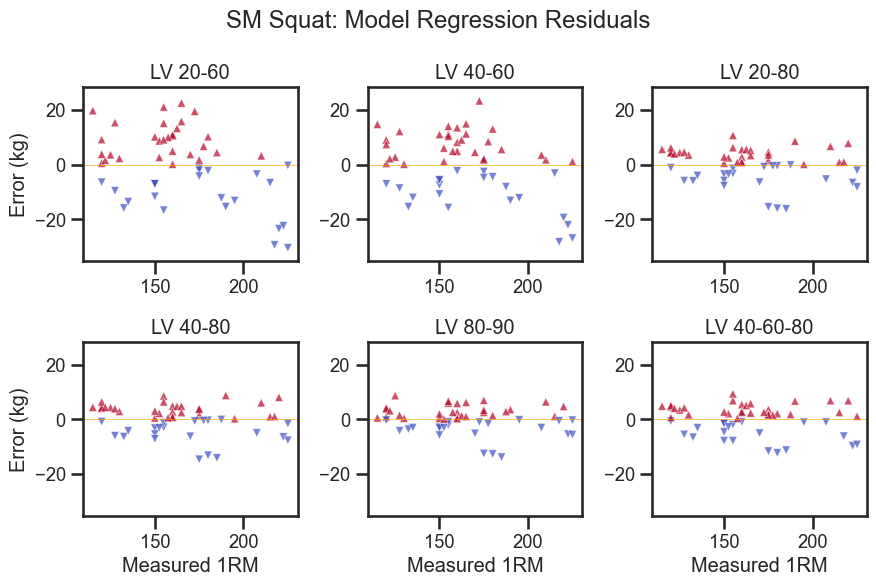

In [11]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
residual_plot2_sm = plot_residuals2(predictions_sm5[selected_models], 
    title='SM Squat', context='talk', pickle_name='05_iteration_SM')

# Redo iteration 2 scatterplot

Metrics dataframe shape (free weight data): (624, 3)


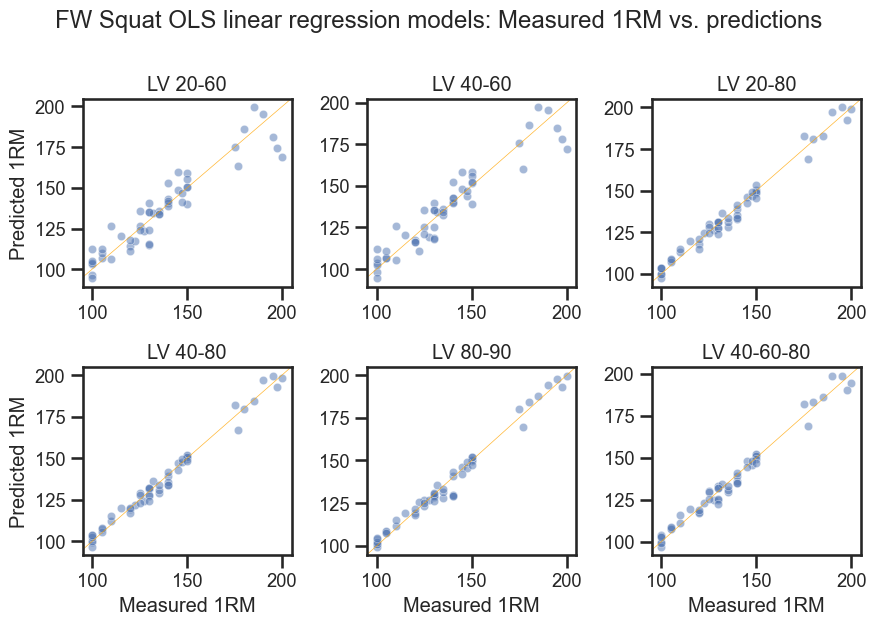

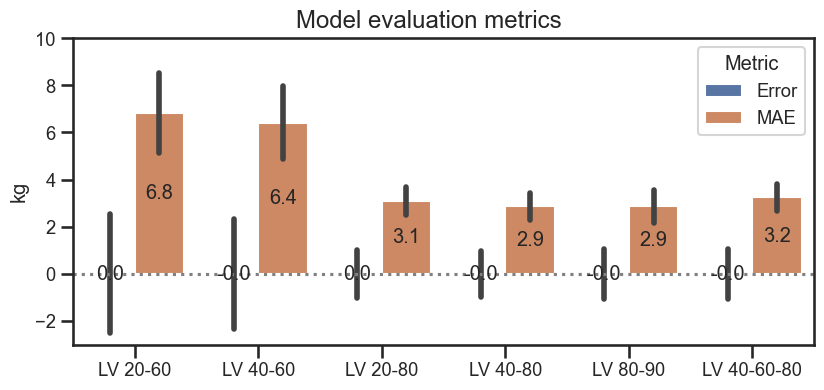

In [65]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
iter2_scatterplot, iter2_error_plot, metrics = compare_models2(predictions_fw2[selected_models], 
    title='FW Squat OLS linear regression models: Measured 1RM vs. predictions', context='talk', ymin=-3)

iter2_scatterplot.savefig('../output/figures/02 iteration measured vs predicted for all samples SELECT MODELS.png')

Metrics dataframe shape (free weight data): (624, 3)


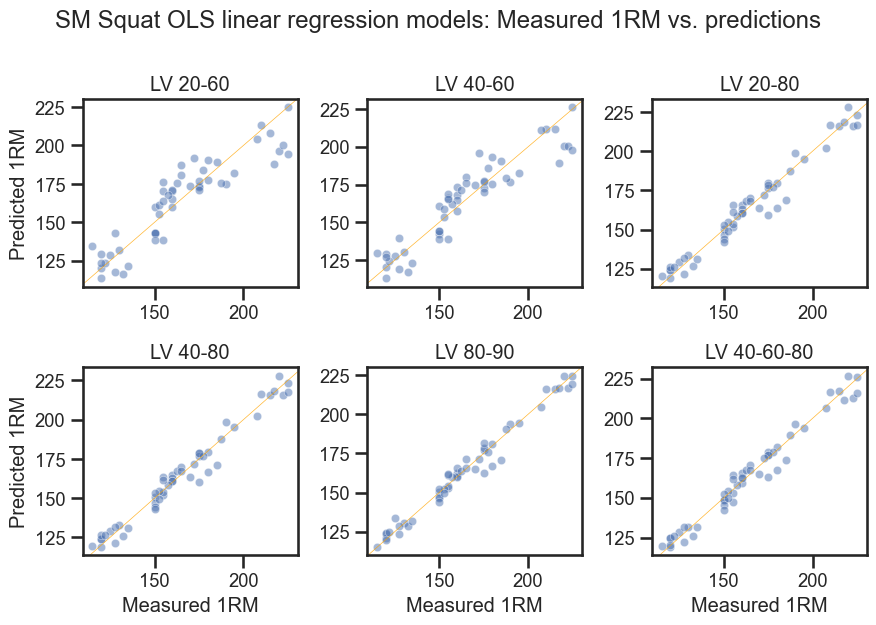

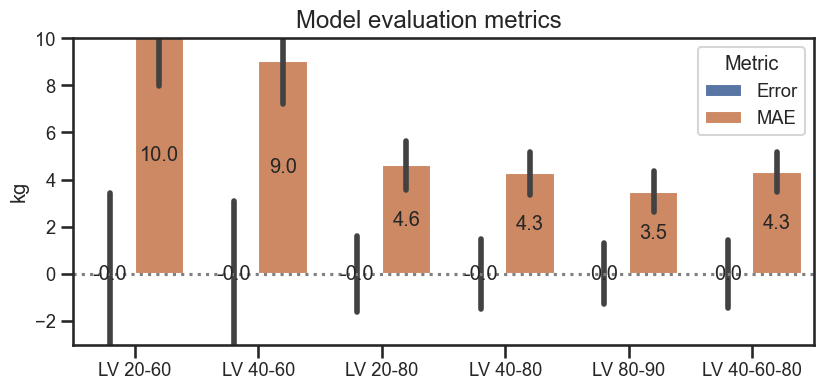

In [9]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
sm_scatterplot, sm_error_plot, metrics = compare_models2(predictions_sm5[selected_models], 
    title='SM Squat OLS linear regression models: Measured 1RM vs. predictions', context='talk', ymin=-3)

sm_scatterplot.savefig('../output/figures/05 iteration SM measured vs predicted for all samples SELECT MODELS.png')

# *End of Page*